<a href="https://colab.research.google.com/github/RohiniRoopa/Machine_Learning/blob/main/Regression_California_housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **California Housing dataset from GitHub**

In [86]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [87]:
housing = load_housing_data()

# **Initial examination of the dataset**

In [88]:
housing.shape

(20640, 10)

In [89]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Checking for null values for each column

In [90]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Checking for duplicate values

In [91]:
housing.duplicated().sum()

0

In [92]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [93]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Checking the correlation

In [94]:
corr_matrix= housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-94-0a84385bd1d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# **Split the dataset into train and test set**

Since the median income looks like an important attribute' let's do stratified Split on the median income

In [95]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Splitting the dataset into training and testing set

In [96]:
from sklearn.model_selection import train_test_split
train_set,test_set= train_test_split(housing,test_size=.2,stratify=housing['income_cat'], random_state=42)

Checking how many % of data fall in each category

In [97]:
test_set["income_cat"].value_counts() / len(test_set)*100

3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: income_cat, dtype: float64

Dropping the column that was created earlier

In [98]:
train_set.drop("income_cat", axis=1, inplace=True)
test_set.drop("income_cat", axis=1, inplace=True)

In [99]:
test_set.shape

(4128, 10)

In [100]:
housing= train_set
housing.shape

(16512, 10)

# **Visualization of the dataset for better understanding**

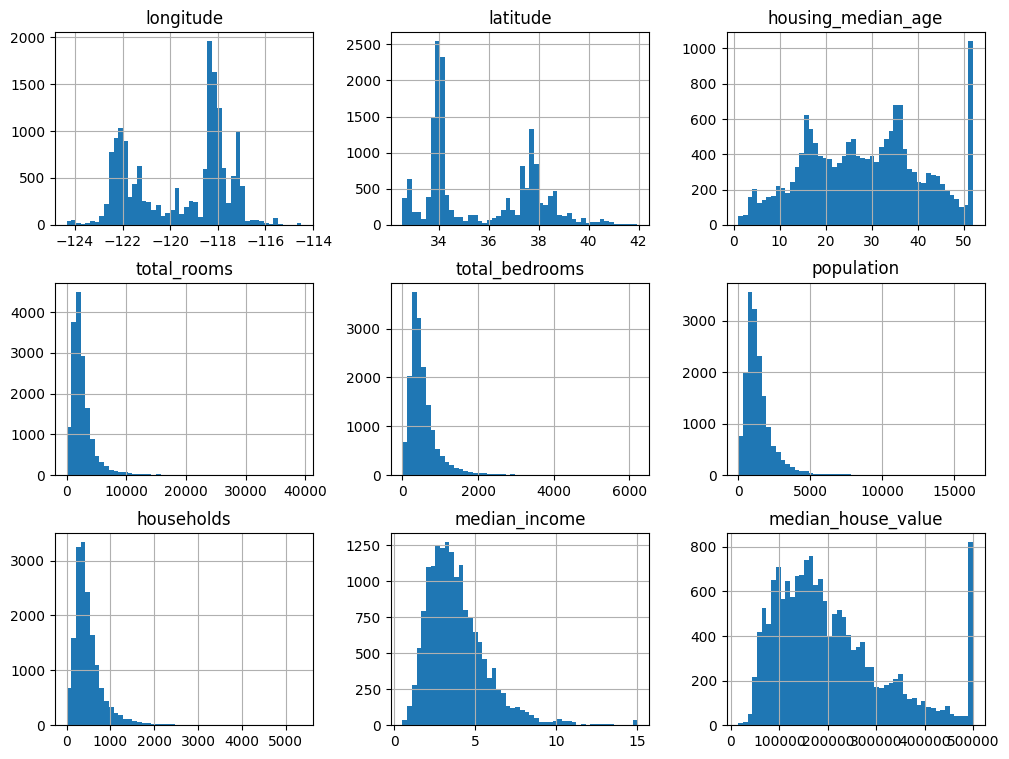

In [101]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,9))
plt.show()

From the above visualization, we can notice a heavy tail on a few attributes. We have to scale these later in the code.

<ipython-input-102-24eabf17f41c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(),annot= True, linewidths=.2)


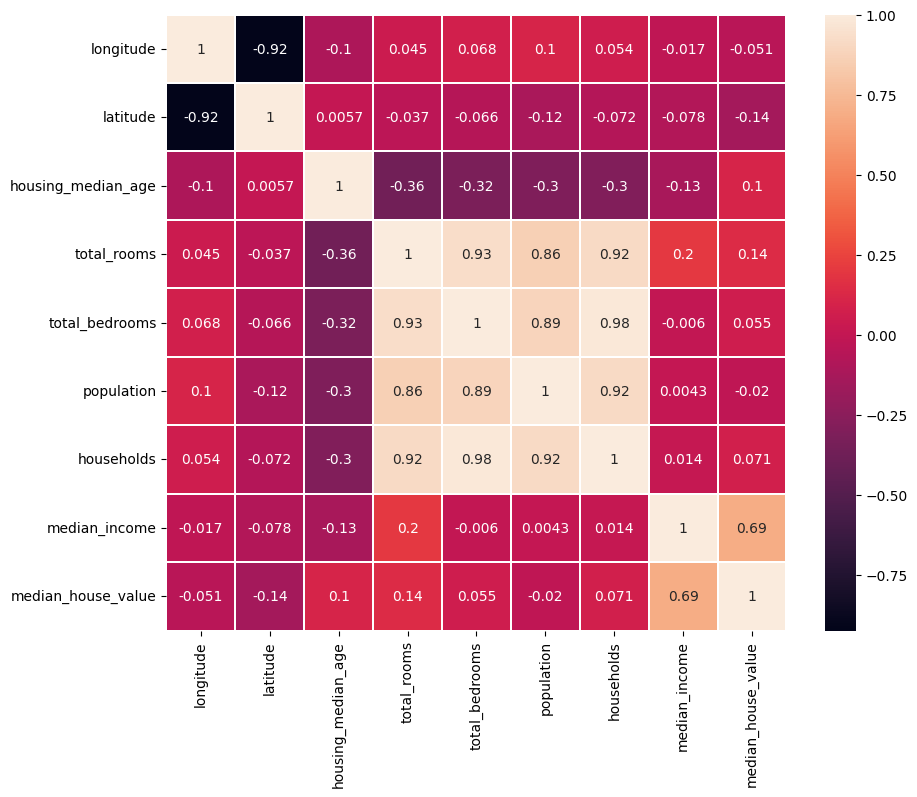

In [102]:
import seaborn as sns
plt.figure(figsize= (10,8))
sns.heatmap(housing.corr(),annot= True, linewidths=.2)
plt.show()

Checking for outliers for all the attributes that has long tail distribution

In [103]:
attributes = [attribute for attribute in housing.columns
              if attribute !='median_house_value'
              and attribute != 'longitude'
              and attribute != 'latitude'
              and attribute != 'housing_median_age' and
              attribute != 'median_income']
data_for_boxplot = housing[attributes]

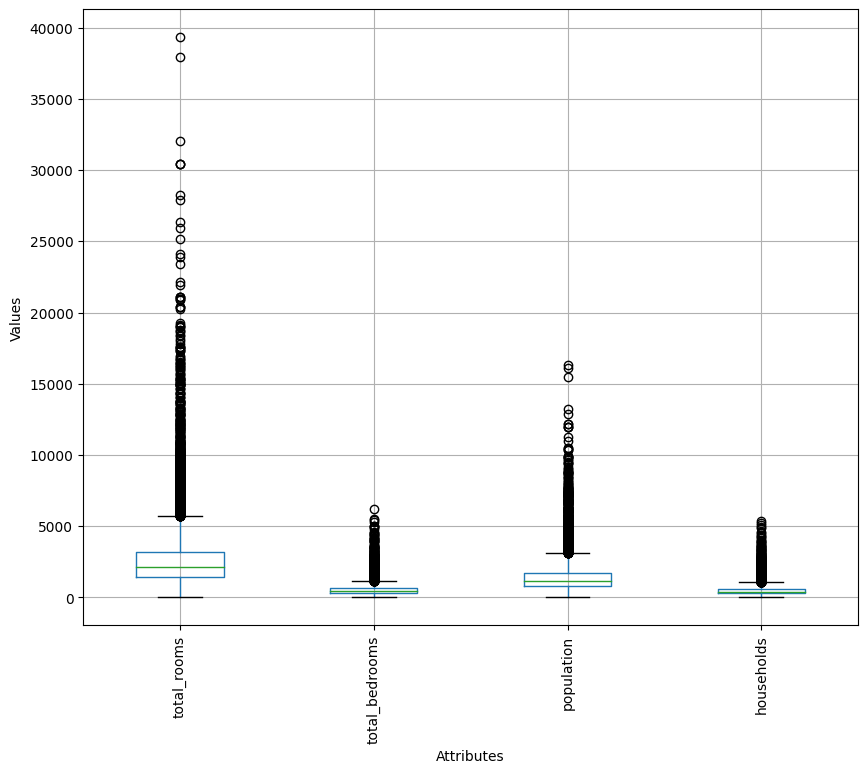

In [104]:
data_for_boxplot.boxplot(figsize=(10,8))
plt.xlabel("Attributes")
plt.ylabel("Values")
# x axis information
plt.xticks(rotation=90)
plt.show()


From the above boxplot, we can see that total_rooms, total_bedrooms, population, and households has more outliers. which is obvious because we noticed long tain before in the histogram chart. Since it might be a true outliers. we can do some scaling or use for attribute combination and drop these attributes. In this project, only transformation and scaling is done

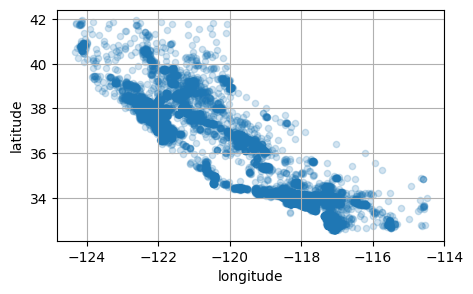

In [105]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,alpha= 0.2,figsize=(5,3))
plt.show()

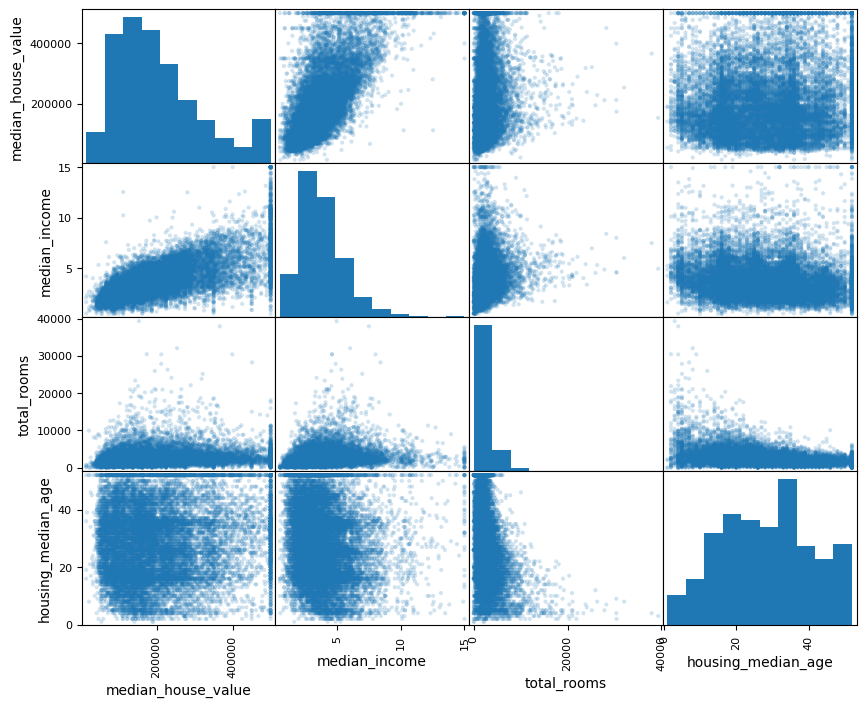

In [106]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(10, 8),alpha=.2)

plt.show()

In [107]:
housing=train_set.drop('median_house_value',axis=1)
housing_label= train_set['median_house_value'].copy()

# **Cleaning the dataset**

Now lets deal with missing values. Using Median value to fill the missing value

In [108]:
null_idx = housing.isnull().any(axis=1)
visual_null_idx= housing.loc[null_idx]

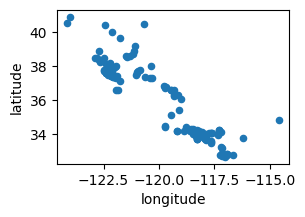

In [109]:
visual_null_idx.plot(kind="scatter", x="longitude", y="latitude",figsize=(3,2))
plt.show()

In [110]:
housing['total_bedrooms'].isnull().sum()

168

Using simpleimputer, all the null values in the total_bedrooms are replaced by median value

In [111]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='median')
housing.iloc[:,4:5]= imputer.fit_transform(housing.iloc[:,4:5])

In [112]:
#checking for the number of unique values in ocean_proximity column
housing.ocean_proximity.nunique()

5

In [113]:
#using onehotencoder lets convert ocean_proximity to integervalue
from sklearn.preprocessing import OneHotEncoder
housing_cat= housing[['ocean_proximity']]

In [114]:
housing_cat.head()

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


In [115]:
encoder= OneHotEncoder(sparse=False)
result=pd.DataFrame(encoder.fit_transform(housing_cat),columns=encoder.get_feature_names_out(),index= housing_cat.index)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [116]:
housing_after_cat= pd.concat([housing, result],axis=1)
housing_after_cat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,0.0,0.0,0.0,1.0,0.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,1.0,0.0,0.0,0.0,0.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,0.0,1.0,0.0,0.0,0.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,0.0,1.0,0.0,0.0,0.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,0.0,0.0,0.0,0.0,1.0


Drop the ocean_proximity since now we have seperate columns to represent it.

In [117]:
housing_after_cat.drop("ocean_proximity", axis=1,inplace=True)
housing1= housing_after_cat

In [118]:
housing1.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,0.0,0.0,0.0,1.0,0.0
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,1.0,0.0,0.0,0.0,0.0
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,0.0,1.0,0.0,0.0,0.0
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,0.0,1.0,0.0,0.0,0.0
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,0.0,0.0,0.0,0.0,1.0


Now we have all columns numerical. we can do the scaling.

# **Scaling**

In [119]:
housing1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

**Log Transformation to all the long tail attributes**

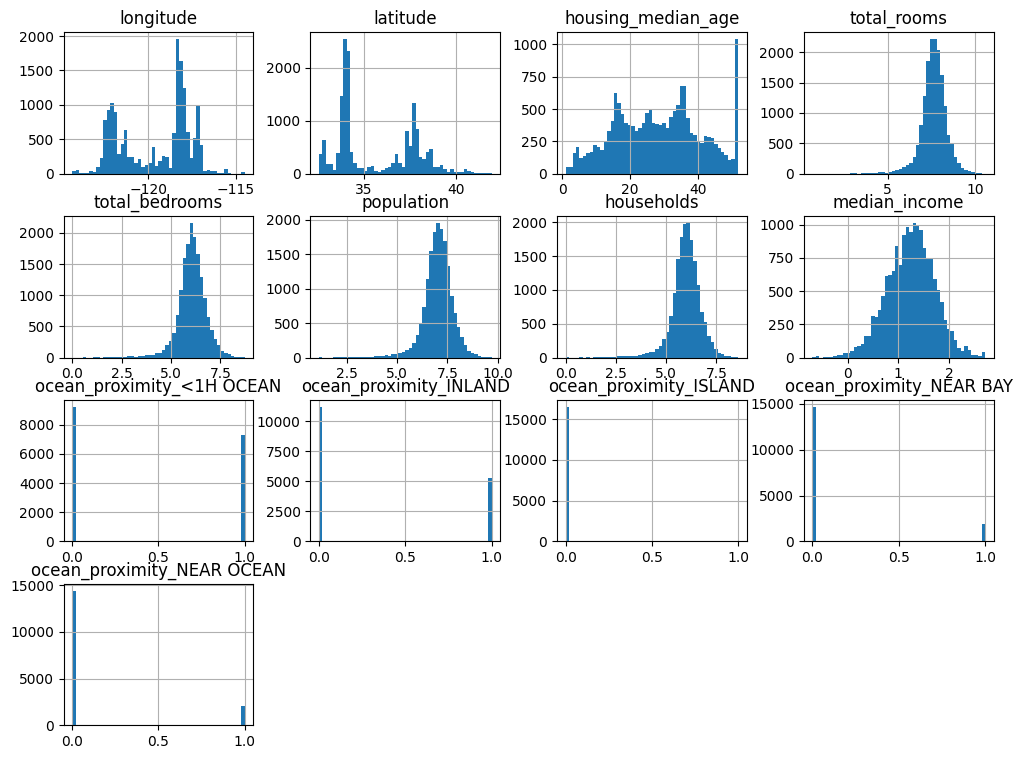

In [120]:
#select the columns to be transformed
columns_to_transform= ['total_rooms','total_bedrooms', 'population', 'households','median_income']
#apply log transformation
housing1[columns_to_transform]= housing1[columns_to_transform].apply(np.log)
#visualize
housing1.hist(bins=50,figsize=(12,9))
plt.show()

In [121]:
housing1.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [122]:
from sklearn.preprocessing import StandardScaler

columns_to_scaled=['longitude','latitude','housing_median_age','total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

scaler= StandardScaler()
housing_scaled= scaler.fit_transform(housing1[columns_to_scaled])
scaled_df= pd.DataFrame(housing_scaled,columns=columns_to_scaled,index=housing1.index )
print(scaled_df.shape)
scaled_df.head()


(16512, 8)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.637892,1.324114,0.456906,1.310369,-1.071522
14973,0.596394,-0.702103,0.907630,-0.063576,-0.252671,-0.711654,-0.142030,1.194712
3785,-1.203098,1.276119,0.351428,-0.859927,-0.925266,-0.941997,-0.913030,-0.756981
14689,1.231216,-0.884924,-0.919891,0.943475,0.952773,0.670700,0.925373,-0.912253
20507,0.711362,-0.875549,0.589800,1.003590,1.437622,0.719093,1.481464,0.034537


In [123]:
# Join the scaled columns with the rest of the data

scaled_housing_data = pd.concat([housing1.drop(columns_to_scaled, axis=1), scaled_df], axis=1)
scaled_housing_data.head()

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,0.0,0.0,0.0,1.0,0.0,-1.423037,1.013606,1.861119,0.637892,1.324114,0.456906,1.310369,-1.071522
14973,1.0,0.0,0.0,0.0,0.0,0.596394,-0.702103,0.907630,-0.063576,-0.252671,-0.711654,-0.142030,1.194712
3785,0.0,1.0,0.0,0.0,0.0,-1.203098,1.276119,0.351428,-0.859927,-0.925266,-0.941997,-0.913030,-0.756981
14689,0.0,1.0,0.0,0.0,0.0,1.231216,-0.884924,-0.919891,0.943475,0.952773,0.670700,0.925373,-0.912253
20507,0.0,0.0,0.0,0.0,1.0,0.711362,-0.875549,0.589800,1.003590,1.437622,0.719093,1.481464,0.034537


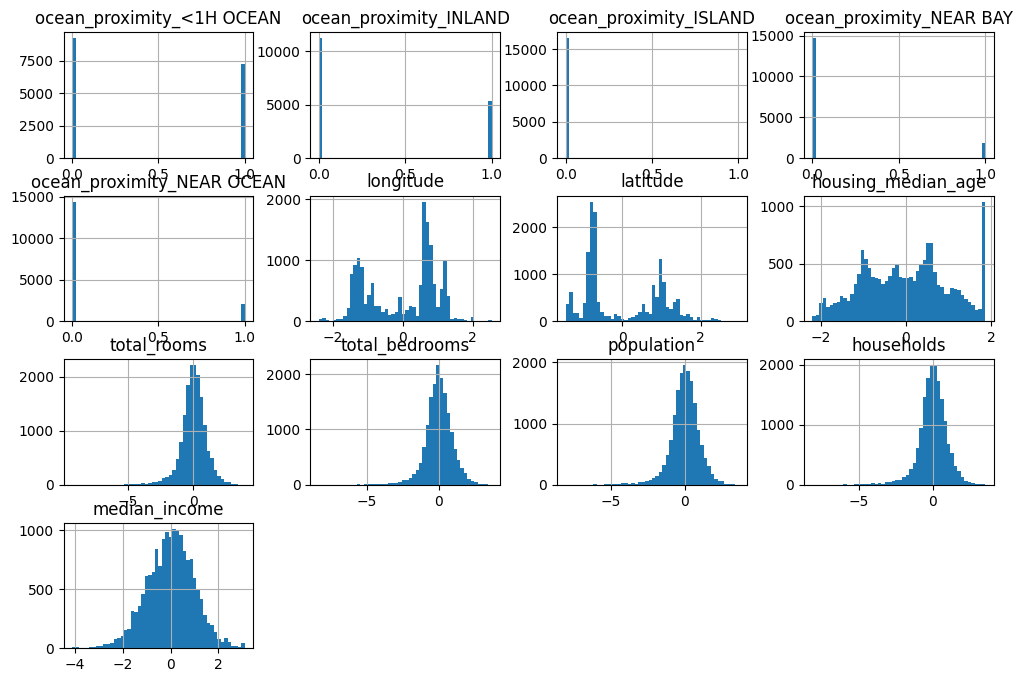

In [124]:
scaled_housing_data.hist(bins=50,figsize=(12,8))
plt.show()

In [125]:
scaled_housing_data.shape

(16512, 13)

# **Model**

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def model_train(model, scaled_housing_data, housing_lable):

  '''functiont to fit and predict the model score with MSE and RMSE score'''

  model.fit(scaled_housing_data, housing_label) # fit

  pred= model.predict(scaled_housing_data) #predict

  train_score= model.score(scaled_housing_data, housing_label)

  cv_score= cross_val_score(model,scaled_housing_data, housing_label, scoring='neg_mean_squared_error',cv= 3)
  cv_score= np.abs(np.mean(cv_score))

  print(f'Train set accuracy: {train_score:.2f}')
  print(f'RMSE : {np.sqrt(mean_squared_error(housing_label, pred)):.0f}')
  print("MSE: ", mean_squared_error(housing_label, pred))
  print('CV score: ', cv_score)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

model= LinearRegression()
model2=tree.DecisionTreeRegressor()
model3=RandomForestRegressor()

model_train(model, scaled_housing_data, housing_label)

Train set accuracy: 0.62
RMSE : 71388
MSE:  5096182589.468023
CV score:  5120156119.89854


DecisionTree Classifier score

In [128]:
model_train(model2, scaled_housing_data, housing_label)

Train set accuracy: 1.00
RMSE : 0
MSE:  0.0
CV score:  5031506511.745761


RandomForest Regressor

In [129]:
model_train(model3, scaled_housing_data, housing_label)

Train set accuracy: 0.98
RMSE : 18108
MSE:  327896178.984187
CV score:  2491774695.821489


# **Pipeline**

**Trying cluster similarity with the location using Kmeans**

In [130]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

#creating a custom class for clustersimilarity
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [131]:
# Lets replace the missing values with median

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from scipy.special import log1p
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# pipeline to replace null values with median, log transfromation, and applies standardscaler

num_pipeline= make_pipeline(SimpleImputer(strategy="median"),
                            FunctionTransformer(np.log,feature_names_out="one-to-one"),
                            StandardScaler() # standardscaler is less affected by outliers
                            )
# pipeline to replace null values with most_frequent(since it is a categorical data), ignore if there is any new category that might flow into the model

cat_pipeline= make_pipeline(
                       SimpleImputer(strategy="most_frequent"),
                       OneHotEncoder(handle_unknown="ignore")
                      )

# pipeline to handle any other attribut that was not handled in previous pipeline(here it handles housing_median_age)
default_pipeline= make_pipeline(
                                SimpleImputer(strategy="median"),
                                StandardScaler()
                                )

#cluster_similarity is applied by calling the function, 'clustersimilarity'

cluster_similarity = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

#Data processing is done usine cloumntransformer

preprocessing= ColumnTransformer(
    [
        ('Numical_pipeline',num_pipeline, ['total_bedrooms','total_rooms','population','households','median_income']),
        ('Geo_pipeline', cluster_similarity, ['latitude','longitude']),
        ('Categorical_pipeline', cat_pipeline,['ocean_proximity'] ),

    ], remainder= default_pipeline
)

In [132]:
housing_prepared= preprocessing.fit_transform(housing)
housing_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 21)

In [133]:
# all column names

preprocessing.get_feature_names_out()

array(['Numical_pipeline__total_bedrooms',
       'Numical_pipeline__total_rooms', 'Numical_pipeline__population',
       'Numical_pipeline__households', 'Numical_pipeline__median_income',
       'Geo_pipeline__Cluster 0 similarity',
       'Geo_pipeline__Cluster 1 similarity',
       'Geo_pipeline__Cluster 2 similarity',
       'Geo_pipeline__Cluster 3 similarity',
       'Geo_pipeline__Cluster 4 similarity',
       'Geo_pipeline__Cluster 5 similarity',
       'Geo_pipeline__Cluster 6 similarity',
       'Geo_pipeline__Cluster 7 similarity',
       'Geo_pipeline__Cluster 8 similarity',
       'Geo_pipeline__Cluster 9 similarity',
       'Categorical_pipeline__ocean_proximity_<1H OCEAN',
       'Categorical_pipeline__ocean_proximity_INLAND',
       'Categorical_pipeline__ocean_proximity_ISLAND',
       'Categorical_pipeline__ocean_proximity_NEAR BAY',
       'Categorical_pipeline__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [134]:
from sklearn.linear_model import LinearRegression # model

lin_model= make_pipeline(preprocessing,LinearRegression()) #using make_pipeline processing is done with LR model
lin_model.fit(housing, housing_label) # fit

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('Numical_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=...
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('Geo_pipeline',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('Categorical_pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [135]:
housing_predict= lin_model.predict(housing) #predict
housing_predict[:5].round(-2) # first 5 records of prediction

array([235200., 370100., 130100.,  91100., 325000.])

In [136]:
housing_label.iloc[:5].values # compare to true label

array([458300., 483800., 101700.,  96100., 361800.])

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# calculate rmse
lin_rmse= mean_squared_error(housing_label, housing_predict, squared=False)
lin_rmse

69593.67378643561

In [138]:
from sklearn.metrics import accuracy_score
accuracy = lin_model.score(housing, housing_label)
# accuracy score of linear model
print(accuracy*100)

63.57484601186215


# **RandomForestRegressor**

In [139]:
from sklearn.ensemble import RandomForestRegressor
forest_reg_model= make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_reg_model.fit(housing, housing_label)
housing_predict = forest_reg_model.predict(housing)


forest_rmses = cross_val_score(forest_reg_model, housing, housing_label,
                                scoring="neg_root_mean_squared_error", cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [140]:
forest_rmses

array([-48645.31485116, -47261.60663971, -47795.97992559, -47777.30147483,
       -47960.1207411 ])

In [141]:
avg_score= np.abs(np.mean(forest_rmses))
print(avg_score)

47888.06472647954


In [142]:
accuracy = forest_reg_model.score(housing, housing_label)
# accuracy score of linear model
print(accuracy*100)

97.69326422731625


# **Fine-Tune the model**

Fine-tune using randomized search cv

In [143]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn. pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_distribs = {'preprocessing__Geo_pipeline__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('Numical_pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(featur...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__Geo_pipeline__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a7b160bcbe0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a7b160bf640>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [144]:
score= np.abs(np.mean(rnd_search.best_score_))
print(score)


44020.57205187334


In [145]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.01, 0.01, 0.01, 0.01, 0.23, 0.03, 0.01, 0.01, 0.02, 0.02, 0.01,
       0.01, 0.02, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.01, 0.02,
       0.03, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.02, 0.03, 0.01, 0.  , 0.06, 0.  , 0.  , 0.  ,
       0.01])

The importance score of each attribute names are sorted, so the least useful columns can be dropped.

In [146]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.2310396190868226, 'Numical_pipeline__median_income'),
 (0.060918834147178906, 'Categorical_pipeline__ocean_proximity_INLAND'),
 (0.0355041507306378, 'Geo_pipeline__Cluster 24 similarity'),
 (0.03456490110786984, 'Geo_pipeline__Cluster 0 similarity'),
 (0.02920278306362059, 'Geo_pipeline__Cluster 43 similarity'),
 (0.0287330931142842, 'Geo_pipeline__Cluster 28 similarity'),
 (0.02274826943834093, 'Geo_pipeline__Cluster 34 similarity'),
 (0.021342273145505398, 'Geo_pipeline__Cluster 20 similarity'),
 (0.021079681295325177, 'Geo_pipeline__Cluster 27 similarity'),
 (0.02023875151112979, 'Geo_pipeline__Cluster 37 similarity'),
 (0.018956787143909463, 'Geo_pipeline__Cluster 40 similarity'),
 (0.0179712397529096, 'Geo_pipeline__Cluster 3 similarity'),
 (0.017493277316184982, 'Geo_pipeline__Cluster 4 similarity'),
 (0.01707642508948528, 'Geo_pipeline__Cluster 17 similarity'),
 (0.016300959963780674, 'Geo_pipeline__Cluster 42 similarity'),
 (0.016016271236171657, 'Geo_pipeline__Cluster 39 s

# **Model on test set**

Using Random forest predict with test set data and its RMSE score

In [147]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

43336.664235360346
